# IDS Assignment - COVID-19 Vaccination Progress Analysis

## Introduction


The data contains the following information:

1. Country - this is the country for which the vaccination information is provided;
2. Country ISO Code - ISO code for the country;
3. Date- date for the data entry; for some of the dates we have only the daily vaccinations, for others, only the (cumulative) total;
4. Total number of vaccin ations - this is the absolute number of total immunizations in the country;
5. Total number of people vaccinated - a person, depending on the immunization scheme, will receive one or more (typically 2) vaccines; at a certain moment, the number of vaccination might be larger than the number of people;
6. Total number of people fully vaccinated - this is the number of people that received the entire set of immunization according to the immunization scheme (typically 2); at a certain moment in time, there might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme;
7. Daily vaccinations (raw) - for a certain data entry, the number of vaccination for that date/country;
8. Daily vaccinations - for a certain data entry, the number of vaccination for that date/country;
9. Total vaccinations per hundred - ratio (in percent) between vaccination number and total population up to the date in the country;
10. Total number of people vaccinated per hundred - ratio (in percent) between population immunized and total population up to the date in the country;
11. Total number of people fully vaccinated per hundred - ratio (in percent) between population fully immunized and total population up to the date in the country;
12. Number of vaccinations per day - number of daily vaccination for that day and country;
13. Daily vaccinations per million - ratio (in ppm) between vaccination number and total population for the current date in the country;
14. Vaccines used in the country - total number of vaccines used in the country (up to date);

# 1. Exploratory Data Analysis

### 1.1 Loading dataset and libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import opendatasets as od

In [3]:
dataSet = pd.read_csv("country_vaccinations.csv")
dataSet.head()

country iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN              1367.0   
2                      NaN                     NaN              1367.0   
3                      NaN                     NaN              1367.0   
4                      NaN                     NaN              1367.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                             0.0                            0.0   
1                             NaN                            NaN   
2                             NaN                            NaN   
3                             NaN                            NaN   
4                             NaN                            NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                  NaN                             NaN   
1                                  NaN                            35.0   
2                                  NaN                            35.0   
3                                  NaN                            35.0   
4                                  NaN                            35.0   

                                            vaccines  \
0  Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...   
1  Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...   
2  Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...   
3  Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...   
4  Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...   

                 source_name            source_website  
0  World Health Organization  https://covid19.who.int/  
1  World Health Organization  https://covid19.who.int/  
2  World Health Organization  https://covid19.who.int/  
3  World Health Organization  https://covid19.who.int/  
4  World Health Organization  https://covid19.who.int/

In [4]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21628 entries, 0 to 21627
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              21628 non-null  object 
 1   iso_code                             21628 non-null  object 
 2   date                                 21628 non-null  object 
 3   total_vaccinations                   12275 non-null  float64
 4   people_vaccinated                    11479 non-null  float64
 5   people_fully_vaccinated              8967 non-null   float64
 6   daily_vaccinations_raw               10187 non-null  float64
 7   daily_vaccinations                   21412 non-null  float64
 8   total_vaccinations_per_hundred       12275 non-null  float64
 9   people_vaccinated_per_hundred        11479 non-null  float64
 10  people_fully_vaccinated_per_hundred  8967 non-null   float64
 11  daily_vaccinations_per_milli

### 1.2 Data Cleaning


In [5]:
#total count of null values in each feature
dataSet.isnull().sum().sort_values(ascending=False)

people_fully_vaccinated                12661
people_fully_vaccinated_per_hundred    12661
daily_vaccinations_raw                 11441
people_vaccinated                      10149
people_vaccinated_per_hundred          10149
total_vaccinations                      9353
total_vaccinations_per_hundred          9353
daily_vaccinations                       216
daily_vaccinations_per_million           216
country                                    0
iso_code                                   0
date                                       0
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

> **`people_fully_vaccinated_per_hundred` and `people_fully_vaccinated` has highest count of nulls followed by `daily_vaccinations_raw` and `people_vaccinated_per_hundred`**

In [6]:
dataSet.fillna(value = 0, inplace = True)
dataSet.head()

country iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 0.0                0.0   
2  Afghanistan      AFG  2021-02-24                 0.0                0.0   
3  Afghanistan      AFG  2021-02-25                 0.0                0.0   
4  Afghanistan      AFG  2021-02-26                 0.0                0.0   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      0.0                     0.0                 0.0   
1                      0.0                     0.0              1367.0   
2                      0.0                     0.0              1367.0   
3                      0.0                     0.0              1367.0   
4                      0.0                     0.0              1367.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                             0.0                            0.0   
1                             0.0                            0.0   
2                             0.0                            0.0   
3                             0.0                            0.0   
4                             0.0                            0.0   

   people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                  0.0                             0.0   
1                                  0.0                            35.0   
2                                  0.0                            35.0   
3                                  0.0                            35.0   
4                                  0.0                            35.0   

                                            vaccines  \
0  Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...   
1  Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...   
2  Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...   
3  Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...   
4  Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...   

                 source_name            source_website  
0  World Health Organization  https://covid19.who.int/  
1  World Health Organization  https://covid19.who.int/  
2  World Health Organization  https://covid19.who.int/  
3  World Health Organization  https://covid19.who.int/  
4  World Health Organization  https://covid19.who.int/

In [7]:
dataSet.describe()

total_vaccinations  people_vaccinated  people_fully_vaccinated  \
count        2.162800e+04       2.162800e+04             2.162800e+04   
mean         4.042746e+06       2.132971e+06             9.094755e+05   
std          2.455146e+07       1.105273e+07             6.084645e+06   
min          0.000000e+00       0.000000e+00             0.000000e+00   
25%          0.000000e+00       0.000000e+00             0.000000e+00   
50%          2.119250e+04       5.835000e+03             0.000000e+00   
75%          8.325940e+05       5.099810e+05             1.070750e+05   
max          6.614680e+08       1.677340e+08             1.350873e+08   

       daily_vaccinations_raw  daily_vaccinations  \
count            2.162800e+04        2.162800e+04   
mean             8.042323e+04        8.791260e+04   
std              6.140054e+05        5.598415e+05   
min              0.000000e+00        0.000000e+00   
25%              0.000000e+00        7.657500e+02   
50%              0.000000e+00        5.703500e+03   
75%              1.546275e+04        3.085875e+04   
max              2.229600e+07        1.917357e+07   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
count                     21628.00000                   21628.000000   
mean                         11.55634                       7.546136   
std                          23.07979                      14.573603   
min                           0.00000                       0.000000   
25%                           0.00000                       0.000000   
50%                           0.50000                       0.120000   
75%                          12.03000                       7.875000   
max                         230.09000                     116.000000   

       people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  
count                         21628.000000                    21628.000000  
mean                              3.253415                     3189.724570  
std                               8.586379                     8168.175566  
min                               0.000000                        0.000000  
25%                               0.000000                      332.000000  
50%                               0.000000                     1579.500000  
75%                               2.030000                     4434.000000  
max                             114.090000                  1000000.000000

### 1.3 Typecast the attributes

In [8]:
dataSet.total_vaccinations = dataSet.total_vaccinations.astype(int)
dataSet.people_vaccinated = dataSet.people_vaccinated.astype(int)
dataSet.people_fully_vaccinated = dataSet.people_fully_vaccinated.astype(int)
dataSet.daily_vaccinations_raw = dataSet.daily_vaccinations_raw.astype(int)
dataSet.daily_vaccinations = dataSet.daily_vaccinations.astype(int)
dataSet.total_vaccinations_per_hundred = dataSet.total_vaccinations_per_hundred.astype(int)
dataSet.people_fully_vaccinated_per_hundred = dataSet.people_fully_vaccinated_per_hundred.astype(int)
dataSet.daily_vaccinations_per_million = dataSet.daily_vaccinations_per_million.astype(int)
dataSet.people_vaccinated_per_hundred = dataSet.people_vaccinated_per_hundred.astype(int)

# 2. Data Wrangling

## 2.1 Data Preprocessing

In [9]:
date = dataSet.date.str.split('-', expand = True)
date

0   1   2
0      2021  02  22
1      2021  02  23
2      2021  02  24
3      2021  02  25
4      2021  02  26
...     ...  ..  ..
21623  2021  05  27
21624  2021  05  28
21625  2021  05  29
21626  2021  05  30
21627  2021  05  31

[21628 rows x 3 columns]

In [10]:
dataSet['year'] = date[0]
dataSet['month'] = date[1]
dataSet['day'] = date[2]
dataSet.year = pd.to_numeric(dataSet.year)
dataSet.month = pd.to_numeric(dataSet.month)
dataSet.day = pd.to_numeric(dataSet.day)
dataSet.date = pd.to_datetime(dataSet.date)
dataSet.head()

country iso_code       date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG 2021-02-22                   0                  0   
1  Afghanistan      AFG 2021-02-23                   0                  0   
2  Afghanistan      AFG 2021-02-24                   0                  0   
3  Afghanistan      AFG 2021-02-25                   0                  0   
4  Afghanistan      AFG 2021-02-26                   0                  0   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                        0                       0                   0   
1                        0                       0                1367   
2                        0                       0                1367   
3                        0                       0                1367   
4                        0                       0                1367   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   

   people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                    0                               0   
1                                    0                              35   
2                                    0                              35   
3                                    0                              35   
4                                    0                              35   

                                            vaccines  \
0  Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...   
1  Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...   
2  Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...   
3  Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...   
4  Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...   

                 source_name            source_website  year  month  day  
0  World Health Organization  https://covid19.who.int/  2021      2   22  
1  World Health Organization  https://covid19.who.int/  2021      2   23  
2  World Health Organization  https://covid19.who.int/  2021      2   24  
3  World Health Organization  https://covid19.who.int/  2021      2   25  
4  World Health Organization  https://covid19.who.int/  2021      2   26

In [11]:
dataSet.describe()

total_vaccinations  people_vaccinated  people_fully_vaccinated  \
count        2.162800e+04       2.162800e+04             2.162800e+04   
mean         4.042746e+06       2.132971e+06             9.094755e+05   
std          2.455146e+07       1.105273e+07             6.084645e+06   
min          0.000000e+00       0.000000e+00             0.000000e+00   
25%          0.000000e+00       0.000000e+00             0.000000e+00   
50%          2.119250e+04       5.835000e+03             0.000000e+00   
75%          8.325940e+05       5.099810e+05             1.070750e+05   
max          6.614680e+08       1.677340e+08             1.350873e+08   

       daily_vaccinations_raw  daily_vaccinations  \
count            2.162800e+04        2.162800e+04   
mean             8.042323e+04        8.791260e+04   
std              6.140054e+05        5.598415e+05   
min              0.000000e+00        0.000000e+00   
25%              0.000000e+00        7.657500e+02   
50%              0.000000e+00        5.703500e+03   
75%              1.546275e+04        3.085875e+04   
max              2.229600e+07        1.917357e+07   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
count                    21628.000000                   21628.000000   
mean                        11.296837                       7.300721   
std                         22.966494                      14.447908   
min                          0.000000                       0.000000   
25%                          0.000000                       0.000000   
50%                          0.000000                       0.000000   
75%                         12.000000                       7.000000   
max                        230.000000                     116.000000   

       people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
count                         21628.000000                    21628.000000   
mean                              3.072915                     3189.724570   
std                               8.473410                     8168.175566   
min                               0.000000                        0.000000   
25%                               0.000000                      332.000000   
50%                               0.000000                     1579.500000   
75%                               2.000000                     4434.000000   
max                             114.000000                  1000000.000000   

               year         month           day  
count  21628.000000  21628.000000  21628.000000  
mean    2020.985713      3.594461     16.065193  
std        0.118674      1.620201      8.686454  
min     2020.000000      1.000000      1.000000  
25%     2021.000000      3.000000      9.000000  
50%     2021.000000      4.000000     16.000000  
75%     2021.000000      5.000000     24.000000  
max     2021.000000     12.000000     31.000000

#### Unique countries

In [12]:
dataSet.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'England',
       'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faeroe Islands', 'Falkland Islands', 'Fiji', 

In [13]:
dataSet.shape

(21628, 18)

**The dataset contains 21628 observations and 18 attributes.**

In [14]:
def size(m, n):
    fig = plt.gcf()
    fig.set_size_inches(10, 10)

In [15]:
# country_wise_total_vaccinated = {}
# for country in dataSet.country.unique() : 
#     vaccinated = 0
    
#     for i in range(len(dataSet)) :
#         if dataSet.country[i] == country : 
#             vaccinated += dataSet.daily_vaccinations[i]
#     country_wise_total_vaccinated[country] = vaccinated 
# #     made a seperate dict from the df 
#     country_wise_total_vaccinated_df = pd.DataFrame.from_dict(country_wise_total_vaccinated,
#                                                          orient='index',
#                                                          columns = ['total_vaccinted_till_date'])
# #     converted dict to df 
# country_wise_total_vaccinated_df.sort_values(by = 'total_vaccinted_till_date', ascending = False, inplace = True)
# country_wise_total_vaccinated_df

*************************************************************************************
### Few Points to note:
    - The dataset contains 21628 observations and 15 attributes.
    - people_fully_vaccinated_per_hundred and people_fully_vaccinated has highest count of nulls followed by daily_vaccinations_raw and people_vaccinated_per_hundred
    - Observations are recorded from Dec 2020 to May 2021
    - Dataset has 214 countries
    - Dataset has 45 unique vaccines
    - China has maximum number of vaccination done followed by USA, India, Brazil and UK
**************************************************************************************

In [16]:
dataSet.groupby(by=["country","vaccines"])['iso_code'].count()

country            vaccines                                               
Afghanistan        Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing      98
Albania            Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V    142
Algeria            Sputnik V                                                   22
Andorra            Oxford/AstraZeneca, Pfizer/BioNTech                        113
Angola             Oxford/AstraZeneca                                          92
                                                                             ... 
Wales              Moderna, Oxford/AstraZeneca, Pfizer/BioNTech               147
Wallis and Futuna  Oxford/AstraZeneca                                          64
Yemen              Oxford/AstraZeneca                                          21
Zambia             Oxford/AstraZeneca, Sinopharm/Beijing                       47
Zimbabwe           Sinopharm/Beijing                                          103
Name: iso_code, Length:

# 3. Feature Selection 

**ExtraTreesClassifier**
~ This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

[0.14136413 0.12908801 0.09765273 0.13423129 0.38152754 0.05230841
 0.03779616 0.02603174]


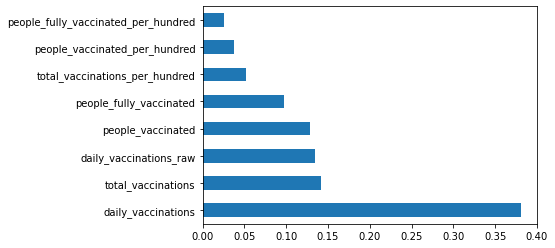

In [17]:
X = dataSet.iloc[:,3:11]  #independent columns
y = dataSet.iloc[:,-1]    #target column 

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#### Plotting top 5,6 and 8 features

In [18]:
dataSet1=dataSet.groupby("country")["people_fully_vaccinated"].max().reset_index().sort_values("people_fully_vaccinated", ascending=False)[:20]
fig=px.bar(dataSet1, x="country", y="people_fully_vaccinated", color="people_fully_vaccinated")
fig.show()

In [19]:
dataSet1=dataSet.groupby("country")["total_vaccinations_per_hundred"].max().reset_index().sort_values("total_vaccinations_per_hundred", ascending=False)[:20]
fig=px.bar(dataSet1, x="country", y="total_vaccinations_per_hundred", color="total_vaccinations_per_hundred")
fig.show()

In [20]:
dataSet1=dataSet.groupby("country")["people_fully_vaccinated_per_hundred"].max().reset_index().sort_values("people_fully_vaccinated_per_hundred", ascending=False)[:20]
fig=px.bar(dataSet1, x="country", y="people_fully_vaccinated_per_hundred", color="people_fully_vaccinated_per_hundred")
fig.show()

# 4. Trend Analysis and Objectives

### 4.1 What vaccinations are used and in which countries?

In [21]:
fig = px.choropleth(dataSet, locations="iso_code",
                    color="vaccines",
                    hover_name="country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                   title= "Vaccines used by different countries")
fig.update_layout(showlegend=False)
fig.show()

### 4.2 Which vaccine is used in most of the countries?

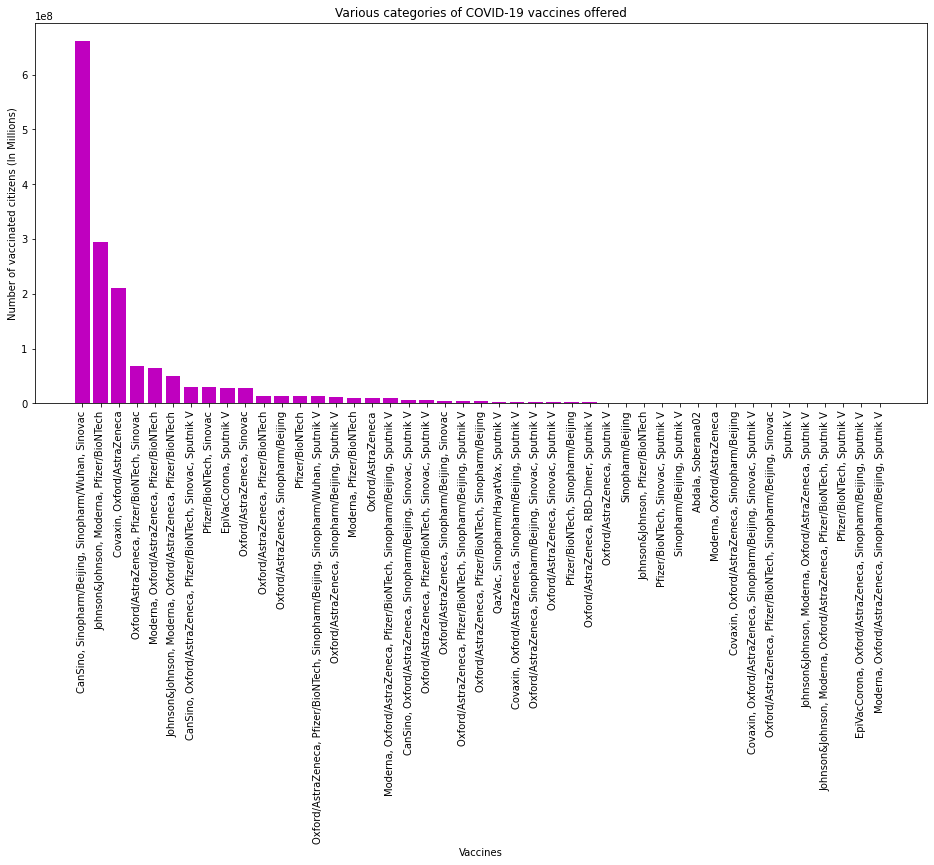

In [22]:
plt.figure(figsize=(16,7))
grp = ['country', 'total_vaccinations', 'iso_code', 'vaccines']
vacc_no = dataSet[grp].groupby('vaccines').max().sort_values('total_vaccinations', ascending=False).dropna(subset=['total_vaccinations'])


plt.bar(vacc_no.index, vacc_no.total_vaccinations, color ='m')

plt.title('Various categories of COVID-19 vaccines offered')
plt.xticks(rotation = 90)
plt.ylabel('Number of vaccinated citizens (In Millions)')
plt.xlabel('Vaccines')
plt.show();

### 4.3 What country has vaccinated a larger percent from its population?

In [23]:
population_country=dataSet.groupby('country')['total_vaccinations_per_hundred'].max().sort_values(ascending=False).head(15)
population_country.reset_index()

country  total_vaccinations_per_hundred
0              Gibraltar                             230
1             Seychelles                             136
2   United Arab Emirates                             130
3       Falkland Islands                             126
4             San Marino                             125
5                 Israel                             122
6         Cayman Islands                             121
7                  Malta                             116
8           Saint Helena                             116
9                Bermuda                             110
10                 Aruba                             106
11           Isle of Man                             105
12                 Wales                             103
13               Bahrain                             101
14                Jersey                             101

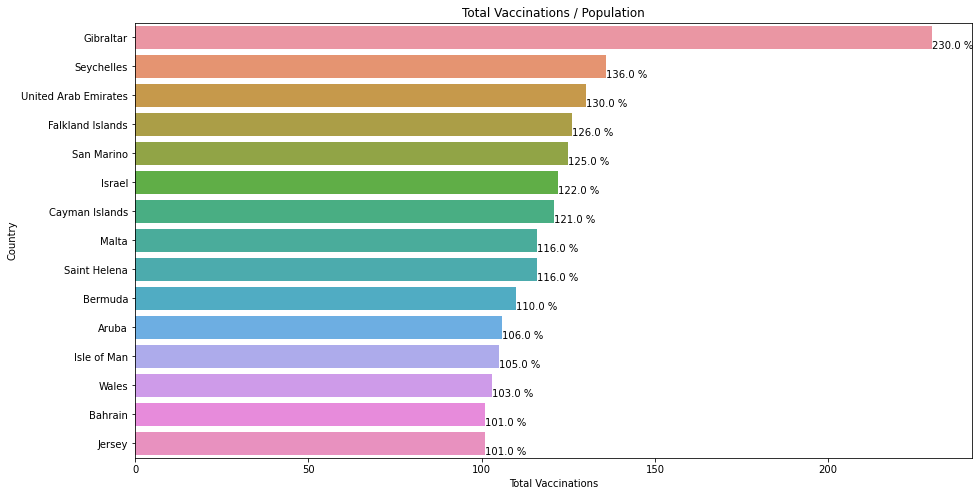

In [24]:
plt.figure(figsize= (15, 8))
ax = sns.barplot(x=population_country, y=population_country.index)
plt.title('Total Vaccinations / Population')
plt.xlabel('Total Vaccinations')
plt.ylabel('Country')

for patch in ax.patches:
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_x()
    y = patch.get_y()
    
    plt.text(width + x, height + y, '{:.1f} %'.format(width))

### 4.4 Represent the progress of India in vaccination.

#### 4.4.1 Preparing DataFrame of dataset for INDIA Vaccination Progress 

In [25]:
data_India = dataSet[dataSet["iso_code"] == 'IND'].copy()
data_India.drop(['people_vaccinated'], axis = 1, inplace = True)
data_India

country iso_code       date  total_vaccinations  people_fully_vaccinated  \
8764   India      IND 2021-01-15                   0                        0   
8765   India      IND 2021-01-16              191181                        0   
8766   India      IND 2021-01-17              224301                        0   
8767   India      IND 2021-01-18              454049                        0   
8768   India      IND 2021-01-19              674835                        0   
...      ...      ...        ...                 ...                      ...   
8896   India      IND 2021-05-27           201203166                 42419560   
8897   India      IND 2021-05-28           203166802                 42561240   
8898   India      IND 2021-05-29           207088953                 42930249   
8899   India      IND 2021-05-30           208665123                 43067110   
8900   India      IND 2021-05-31           210449895                 43258810   

      daily_vaccinations_raw  daily_vaccinations  \
8764                       0                   0   
8765                  191181              191181   
8766                   33120              112150   
8767                  229748              151350   
8768                  220786              168709   
...                      ...                 ...   
8896                 2777551             1902326   
8897                 1963636             1971730   
8898                 3922151             2320922   
8899                 1576170             2420840   
8900                 1784772             2326312   

      total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
8764                               0                              0   
8765                               0                              0   
8766                               0                              0   
8767                               0                              0   
8768                               0                              0   
...                              ...                            ...   
8896                              14                             11   
8897                              14                             11   
8898                              15                             11   
8899                              15                             12   
8900                              15                             12   

      people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
8764                                    0                               0   
8765                                    0                             139   
8766                                    0                              81   
8767                                    0                             110   
8768                                    0                             122   
...                                   ...                             ...   
8896                                    3                            1378   
8897                                    3                            1429   
8898                                    3                            1682   
8899                                    3                            1754   
8900                                    3                            1686   

                         vaccines          source_name  \
8764  Covaxin, Oxford/AstraZeneca  Government of India   
8765  Covaxin, Oxford/AstraZeneca  Government of India   
8766  Covaxin, Oxford/AstraZeneca  Government of India   
8767  Covaxin, Oxford/AstraZeneca  Government of India   
8768  Covaxin, Oxford/AstraZeneca  Government of India   
...                           ...                  ...   
8896  Covaxin, Oxford/AstraZeneca  Government of India   
8897  Covaxin, Oxford/AstraZeneca  Government of India   
8898  Covaxin, Oxford/AstraZeneca  Government of India   
8899  Covaxin, Oxford/AstraZeneca  Government of 

#### 4.4.2 Plotting the DataFrame to show trend in vaccination progress in India

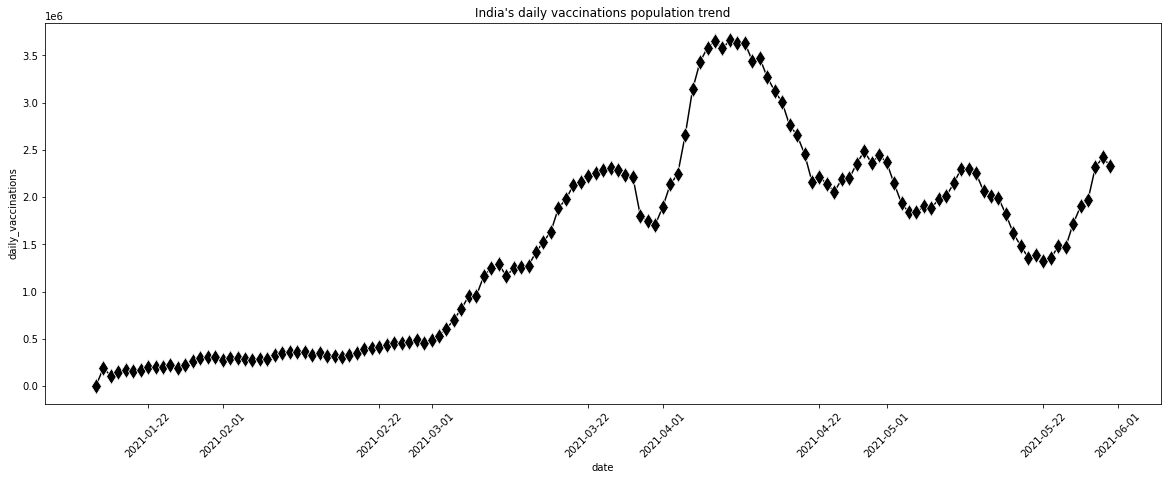

In [26]:
plt.figure(figsize=(20,7))

sns.lineplot(data=data_India,x="date",y="daily_vaccinations",marker='d',markersize= 12, color = 'k')

plt.title("India's daily vaccinations population trend")
plt.xticks(rotation=45)
plt.show();

### 4.5 Analyze the progress of vaccination country-wise and continent-wise.

#### 4.5.1 Country-Wise Progress

In [27]:
cols = ['country', 'total_vaccinations', 'iso_code', 'vaccines']
vacc_amount = dataSet[cols].groupby('country').max().sort_values('total_vaccinations', ascending=False).dropna(subset=['total_vaccinations'])


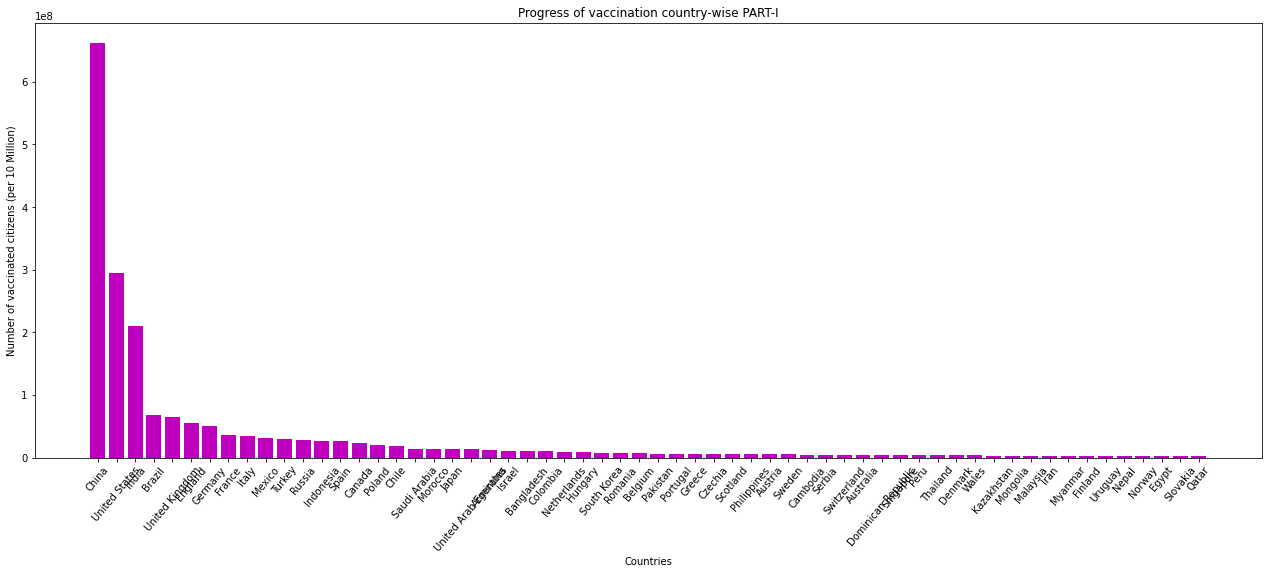

In [28]:
vacc_amount_p1 = vacc_amount.iloc[:60]

plt.figure(figsize=(22, 8))
plt.bar(vacc_amount_p1.index, vacc_amount_p1.total_vaccinations, color = 'm')

plt.title('Progress of vaccination country-wise PART-I')
plt.xticks(rotation = 50)
plt.ylabel('Number of vaccinated citizens (per 10 Million)')
plt.xlabel('Countries')
plt.show();

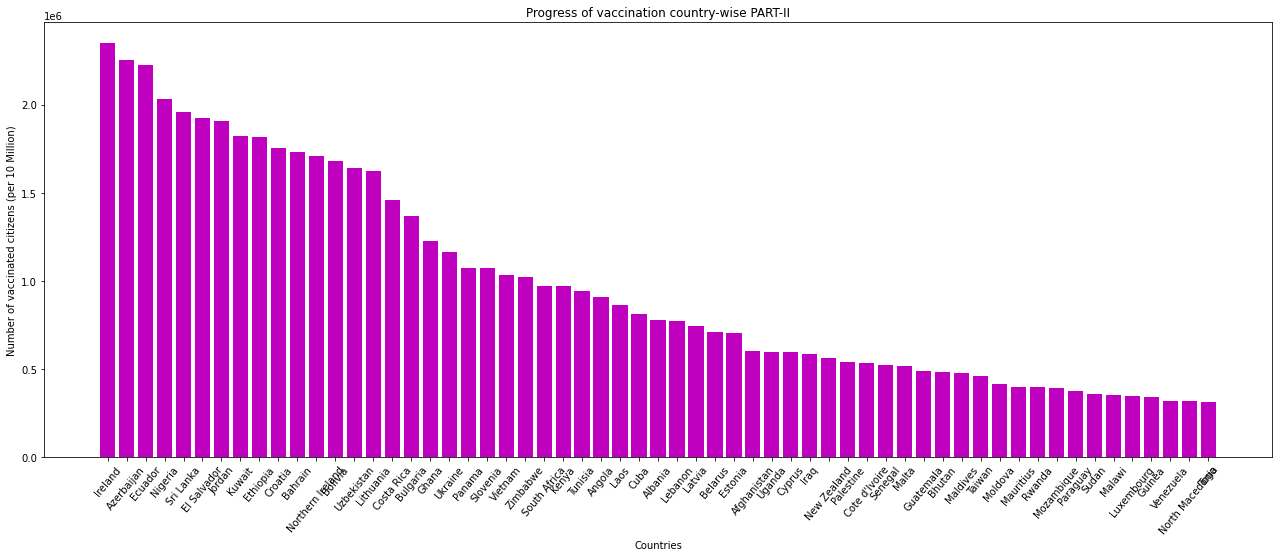

In [29]:
vacc_amount_p2 = vacc_amount.iloc[61:120]

plt.figure(figsize=(22, 8))
plt.bar(vacc_amount_p2.index, vacc_amount_p2.total_vaccinations, color = 'm')

plt.title('Progress of vaccination country-wise PART-II')
plt.xticks(rotation = 50)
plt.ylabel('Number of vaccinated citizens (per 10 Million)')
plt.xlabel('Countries')
plt.show();

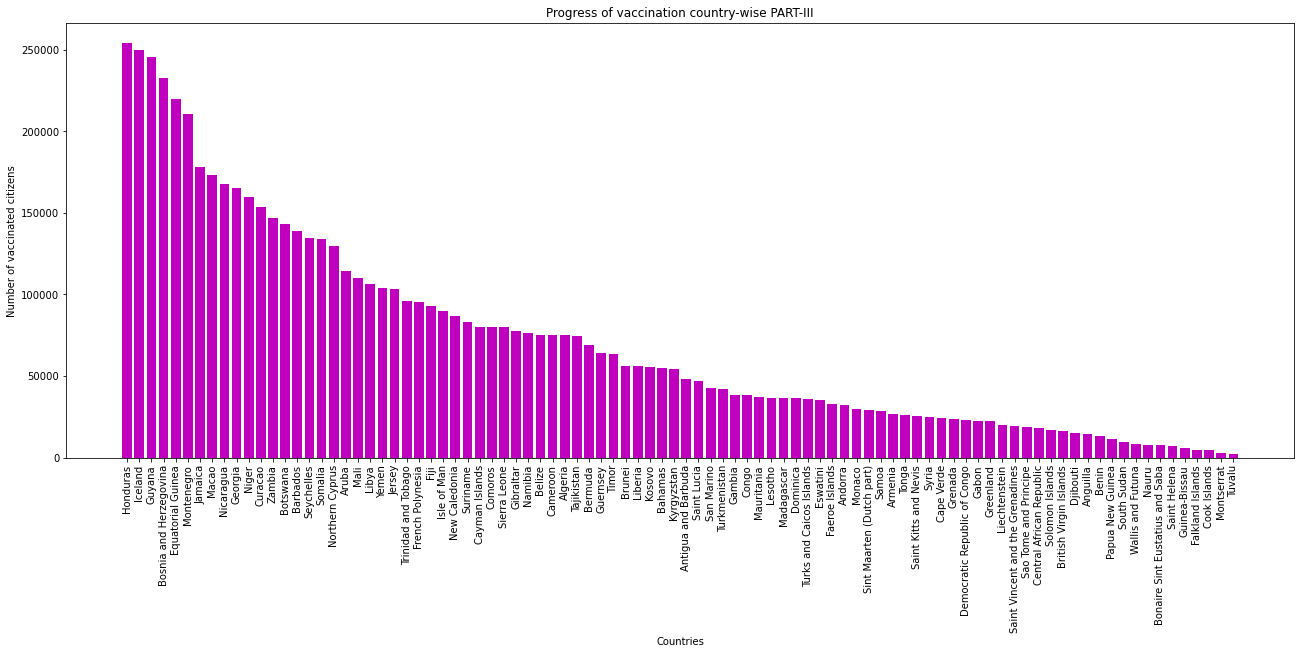

In [30]:
vacc_amount_p3 = vacc_amount.iloc[121:-1]

plt.figure(figsize=(22, 8))
plt.bar(vacc_amount_p3.index, vacc_amount_p3.total_vaccinations, color = 'm')

plt.title('Progress of vaccination country-wise PART-III')
plt.xticks(rotation = 90)
plt.ylabel('Number of vaccinated citizens')
plt.xlabel('Countries')
plt.show();

#### 4.5.2 Continent-Wise Progress

**Preparing The Dataset**

In [31]:
import pycountry_convert as pc

continent_wise_data = {}

# print(vacc_amount)

for index, row in vacc_amount.iterrows():
    # print(index)
    # print(row['total_vaccinations'])
    country = index
    if country not in ['England', 'Scotland', 'Wales', 'Northern Ireland',
                       'Cote d\'Ivoire', 'Curacao', 'Timor', 'Kosovo',
                       'Faeroe Islands', 'Democratic Republic of Congo', 'Bonaire Sint Eustatius and Saba', 'Saint Helena'] :
        country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
        # print(country_code)
        if country_code not in ['SX', 'PN'] : 
            continent_name = pc.country_alpha2_to_continent_code(country_code)
            # print("#### CONTINENT ####", continent_name)
            if continent_name not in continent_wise_data :
                continent_wise_data[continent_name] = 0
            else:
                continent_wise_data[continent_name] += row['total_vaccinations']
                
continent_wise_data_df = pd.DataFrame.from_dict(continent_wise_data,
                                                         orient='index',
                                                         columns = ['total_vaccinted_till_date'])

continent_wise_data_df 

total_vaccinted_till_date
AS                  401265430
NA                   65830766
SA                   52155154
EU                  291120222
AF                   18096004
OC                     942313

**Diplaying The Progress**

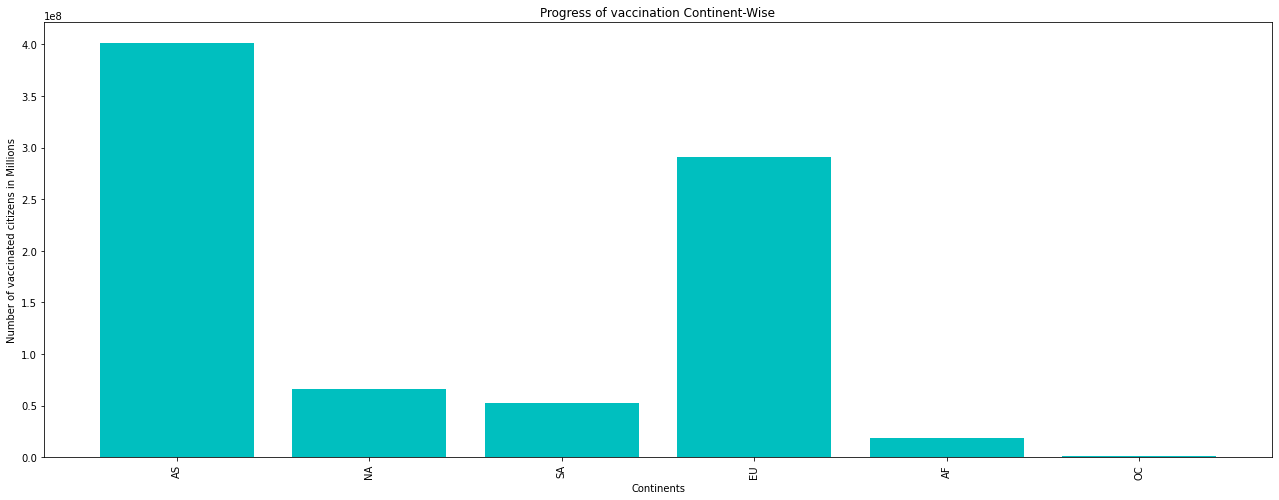

In [32]:
plt.figure(figsize=(22, 8))
plt.bar(continent_wise_data_df.index, continent_wise_data_df.total_vaccinted_till_date, color = 'c')

plt.title('Progress of vaccination Continent-Wise')
plt.xticks(rotation = 90)
plt.ylabel('Number of vaccinated citizens in Millions')
plt.xlabel('Continents')
plt.show();

# 5. Observations and Conclusion

From the above analysis and visualizations we can conclude that:
1) Many countries stated applying vaccines to their people by the end of 2020, whereas India started its vaccination programme from 15th Jan, 2021.

2) The rate of applying vaccines to the patients is highest in UK, whereas it is lowest in India. One of the reasons the rate of vaccine reaching people is low could be because **India is a developing country**.

3) **Moderna, Pfizer/BioNTech** is the most popular vaccine used worldwide, since it has almost negligible side effects (known till date). Also India uses **Covaxin, Covishield** for vaccinating its subjects.

4) Maximum number of people vaccinated is highest in USA since USA is a developed nation as well as it has better health facalities than other developing nations.

From the above inferences it can be concluded that people from all the parts of the world are educating themselves and willingly taking the vaccines in most parts of the world. Also these vaccines have been proved effective against COVID-19 (till now). If the rate of people taking the vaccine continues to grow then all the countries can vaccinate their people before the end of this year. 